# 가위바위보 분류기 만들기
## (Rock Scissor Paper Classifier)

> ### **요약**
> **train_data : 3000ea**  
> **Validation_data : 300ea**  
> **=> slack에 올라와있는 사진 3300장 중에 300장을 Validation_data로 사용하고, 나머지 3000장을 train_data로 사용하였다.  
> [(해당 slack 페이지로 가기)](https://aiffel.slack.com/archives/C01HAK8SLLW/p1609832433416700)**   
> **test_data : 300ea**  
> **=> 윤선님이 제공해주신 test셋 사진 중 가위, 바위, 보 각 100장씩 총 300장을 뽑아 사용하였다.  
> [(해당 slack 페이지로 가기)](https://aiffel.slack.com/archives/C01HAK8SLLW/p1609807863375800)**  
> **`test acurracy : 75.6%`**  
> **`번외test acurracy : 87.7%`**  
  
### - 분류기 모델 만들기

***
#### **1. 라이브러리 import**

In [37]:
from PIL import Image
import os, glob

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


***
#### **2.1 train data 준비하기**
- **가위 이미지**

In [38]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/scissor
가위 이미지 resize 완료!


- **바위 이미지**

In [39]:
# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  


# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/rock
바위 이미지 resize 완료!


- **보 이미지**

In [40]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/paper
보 이미지 resize 완료!


- **train data 전처리**

In [41]:
import numpy as np
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=3000   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("학습데이터(x_train)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train)=load_data(image_dir_path)

# 데이터를 정규화시키기 위해 픽셀의 최소값 최대값을 확인
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))


학습데이터(x_train)의 이미지 개수는 3000 입니다.
최소값: 0  최대값: 255


In [42]:
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train_norm.shape))
print("y_train shape: {}".format(y_train.shape))

x_train shape: (3000, 28, 28, 3)
y_train shape: (3000,)


라벨:  0


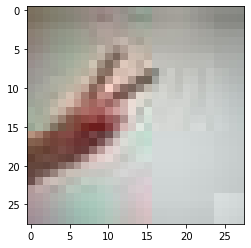

In [43]:
import matplotlib.pyplot as plt
plt.imshow(x_train_norm[0])
print('라벨: ', y_train[0])

***
#### **2.2 train model 설계하기**
> **특징을 잡아낼 레이어 갯수 : 3ea**  
> **레이어별 특징 갯수**  
> **_channel_1_ : 32**  
> **_channel_2_ : 64**  
> **_channel_3_ : 64**  
> **dense 레이어 뉴런수 : 64**  
> **학습 반복횟수(dense) : 40**  

In [44]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?
# [[YOUR CODE]]
n_channel_1=32
n_channel_2=64
n_channel_3=64
n_dense=64
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  9
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (

- **train model 학습**

In [45]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# [[YOUR CODE]]
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# model 학습
# 정규화된 data로 모델 학습
model.fit(x_train_norm, y_train, epochs=n_train_epoch)


# 학습모델 시험
# 정규화된 data로 모델 시험
train_loss, train_accuracy = model.evaluate(x_train_norm, y_train, verbose=2)
print("train_loss: {} ".format(train_loss))
print("train_accuracy: {}".format(train_accuracy))

Epoch 1/20
94/94 [==============================] - 0s 2ms/step - loss: 1.0917 - accuracy: 0.3610
Epoch 2/20
94/94 [==============================] - 0s 2ms/step - loss: 0.9282 - accuracy: 0.5553
Epoch 3/20
94/94 [==============================] - 0s 2ms/step - loss: 0.6867 - accuracy: 0.7157
Epoch 4/20
94/94 [==============================] - 0s 2ms/step - loss: 0.5213 - accuracy: 0.7843
Epoch 5/20
94/94 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8627
Epoch 6/20
94/94 [==============================] - 0s 2ms/step - loss: 0.2745 - accuracy: 0.9013
Epoch 7/20
94/94 [==============================] - 0s 2ms/step - loss: 0.2139 - accuracy: 0.9253
Epoch 8/20
94/94 [==============================] - 0s 2ms/step - loss: 0.1524 - accuracy: 0.9490
Epoch 9/20
94/94 [==============================] - 0s 2ms/step - loss: 0.1071 - accuracy: 0.9697
Epoch 10/20
94/94 [==============================] - 0s 2ms/step - loss: 0.0905 - accuracy: 0.9710
Epoch 11/20
94/94 [

 * **학습결과**
> **accuracy : 0.9993**  
> **loss : 0.0105**  
***  
#### **3.1 validation data 준비하기**

In [62]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/validation/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")



# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/validation/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  


# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")



# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/validation/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/validation/scissor
가위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/validation/rock
바위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/validation/paper
보 이미지 resize 완료!


- **validation data 전처리**

In [46]:
# train data와 흡사하게 코딩. 단 경로에 유의할 것
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("검증데이터(x_validation)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

# train data 경로가 아닌 validation 경로
validationimage_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/validation"
(x_validation, y_validation)=load_data(validationimage_dir_path)
x_validation_norm = x_validation/255.0   # 입력은 0~1 사이의 값으로 정규화



검증데이터(x_validation)의 이미지 개수는 300 입니다.


***
#### **3.2 validation model 설계하기**
> **1차  
> 특징을 잡아낼 레이어 갯수 : 3ea  
> 레이어별 특징 갯수  
> _channel_1_ : 32  
> _channel_2_ : 64  
> _channel_3_ : 64  
> dense 레이어 뉴런수 : 64  
> 학습 반복횟수(dense) : 40**  

In [47]:
n_channel_1=32
n_channel_2=64
n_channel_3=64
n_dense=64
n_train_epoch=40

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
validation_loss, validation_accuracy = model.evaluate(x_validation_norm, y_validation, verbose=2)
print("validation_loss: {} ".format(validation_loss))
print("validation_accuracy: {}".format(validation_accuracy))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)               

 * **1차 검증결과**
> **accuracy : 0.6233**  
> **loss : 3.6640**  

***   
* **2차 설계**
> **특징을 잡아낼 레이어 갯수 : 3ea  
> 레이어별 특징 갯수  
> _channel_1_ : 32  
> _channel_2_ : 32  
> _channel_3_ : 32  
> dense 레이어 뉴런수 : 64  
> 학습 반복횟수(dense) : 40** 

In [49]:
n_channel_1=32
n_channel_2=32
n_channel_3=32
n_dense=64
n_train_epoch=40

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
validation_loss, validation_accuracy = model.evaluate(x_validation_norm, y_validation, verbose=2)
print("validation_loss: {} ".format(validation_loss))
print("validation_accuracy: {}".format(validation_accuracy))

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 32)               

 * **2차 검증결과**
> **accuracy : 0.5467**  
> **loss : 3.7487**  
> **accuracy 감소, loss 증가**

***   
* **3차 설계** 
> **특징을 잡아낼 레이어 갯수 : 3ea  
> 레이어별 특징 갯수  
> _channel_1_ : 16  
> _channel_2_ : 16  
> _channel_3_ : 16  
> dense 레이어 뉴런수 : 64  
> 학습 반복횟수(dense) : 40** 

In [50]:
n_channel_1=16
n_channel_2=16
n_channel_3=16
n_dense=64
n_train_epoch=40

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
validation_loss, validation_accuracy = model.evaluate(x_validation_norm, y_validation, verbose=2)
print("validation_loss: {} ".format(validation_loss))
print("validation_accuracy: {}".format(validation_accuracy))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 16)        448       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 16)        2320      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 16)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 3, 3, 16)          2320      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 1, 1, 16)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 16)               

 * **3차 검증결과**
> **accuracy : 0.5433**  
> **loss : 3.4109**  
> **accuracy 감소, loss 감소**

***   
* **4차 설계** 
> **특징을 잡아낼 레이어 갯수 : 3ea  
> 레이어별 특징 갯수  
> _channel_1_ : 32  
> _channel_2_ : 32  
> _channel_3_ : 32  
> 정확도가 높이나온 특징갯수로 선정
> dense 레이어 뉴런수 : 64  
> 학습 반복횟수(dense) : 30 
> 반복횟수 감소**

In [51]:
n_channel_1=32
n_channel_2=32
n_channel_3=32
n_dense=64
n_train_epoch=30

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
validation_loss, validation_accuracy = model.evaluate(x_validation_norm, y_validation, verbose=2)
print("validation_loss: {} ".format(validation_loss))
print("validation_accuracy: {}".format(validation_accuracy))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 32)               

 * **4차 검증결과**
> **accuracy : 0.5933**  
> **loss : 2.5309**  
> **accuracy 증가, loss 감소**

***   
* **5차 설계** 
> **특징을 잡아낼 레이어 갯수 : 3ea  
> 레이어별 특징 갯수  
> _channel_1_ : 32  
> _channel_2_ : 32  
> _channel_3_ : 32    
> dense 레이어 뉴런수 : 64  
> 학습 반복횟수(dense) : 20** 

In [52]:
n_channel_1=32
n_channel_2=32
n_channel_3=32
n_dense=64
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
validation_loss, validation_accuracy = model.evaluate(x_validation_norm, y_validation, verbose=2)
print("validation_loss: {} ".format(validation_loss))
print("validation_accuracy: {}".format(validation_accuracy))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 32)               

 * **5차 검증결과**
> **accuracy : 0.6133**  
> **loss : 2.7086**  
> **accuracy 증가, loss 증가**

***   
* **6차 설계** 
> **특징을 잡아낼 레이어 갯수 : 3ea  
> 레이어별 특징 갯수  
> _channel_1_ : 64  
> _channel_2_ : 32  
> _channel_3_ : 32    
> dense 레이어 뉴런수 : 128  
> 학습 반복횟수(dense) : 20** 

In [54]:
n_channel_1=64
n_channel_2=32
n_channel_3=32
n_dense=128
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
validation_loss, validation_accuracy = model.evaluate(x_validation_norm, y_validation, verbose=2)
print("validation_loss: {} ".format(validation_loss))
print("validation_accuracy: {}".format(validation_accuracy))

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_27 (Conv2D)           (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 32)               

 * **6차 검증결과**
> **accuracy : 0.6333**  
> **loss : 2.2834**  
> **accuracy 증가, loss 감소**

***   
* **7차 설계** 
> **특징을 잡아낼 레이어 갯수 : 3ea  
> 레이어별 특징 갯수  
> _channel_1_ : 32  
> _channel_2_ : 64  
> _channel_3_ : 64    
> dense 레이어 뉴런수 : 128  
> 학습 반복횟수(dense) : 20** 

In [102]:
n_channel_1=32
n_channel_2=64
n_channel_3=64
n_dense=125
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
validation_loss, validation_accuracy = model.evaluate(x_validation_norm, y_validation, verbose=2)
print("validation_loss: {} ".format(validation_loss))
print("validation_accuracy: {}".format(validation_accuracy))

Model: "sequential_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_165 (Conv2D)          (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_165 (MaxPoolin (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_166 (Conv2D)          (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_166 (MaxPoolin (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_167 (Conv2D)          (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_167 (MaxPoolin (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_55 (Flatten)         (None, 64)              

 * **7차 검증결과**
> **accuracy : 0.6533**  
> **loss : 2.2792**  
> **accuracy 증가, loss 증가**
> **최종 파라미터 확정**

***   
* **최종 파라미터** 
> **특징을 잡아낼 레이어 갯수 : 3ea  
> 레이어별 특징 갯수  
> _channel_1_ : 32  
> _channel_2_ : 64  
> _channel_3_ : 64    
> dense 레이어 뉴런수 : 128  
> 학습 반복횟수(dense) : 20** 

***
#### **4.1 test data 준비하기**

In [59]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")



# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  


# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")



# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")

이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/test/scissor
가위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/test/rock
바위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/test/paper
보 이미지 resize 완료!


- **test data 전처리**

In [62]:
# train data와 흡사하게 코딩. 단 경로에 유의할 것
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=300   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("테스트데이터(x_test)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

# train data 경로가 아닌 test 경로
testimage_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(testimage_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


***
#### **4.2 test model 설계하기**
* **최종 파라미터** 
> **특징을 잡아낼 레이어 갯수 : 3ea  
> 레이어별 특징 갯수  
> _channel_1_ : 32  
> _channel_2_ : 64  
> _channel_3_ : 64    
> dense 레이어 뉴런수 : 128  
> 학습 반복횟수(dense) : 20** 

In [64]:
n_channel_1=32
n_channel_2=64
n_channel_3=64
n_dense=128
n_train_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_56 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 64)              

 * **최종 테스트결과**
> **accuracy : 0.7567**  
> **loss : 1.4422**  

***

#### **5.1 번외 model 설계하기**
> **목표 : 정돈된 data가 정확도값에 어떤 영향을 끼치는지 확인**  
> **train data : slack에 윤선님이 올려주신 data로 학습.**  
> **test data : 위의 testdata와 동일.**  

- **번외 train data 전처리**

In [67]:
# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/new/Nscissor"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("가위 이미지 resize 완료!")



# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/new/Nrock"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  


# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("바위 이미지 resize 완료!")



# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
# [[YOUR CODE]]
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/new/Npaper"
print("이미지 디렉토리 경로: ", image_dir_path)

images=glob.glob(image_dir_path + "/*.jpg")  

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# [[YOUR CODE]]
target_size=(28,28)
for img in images:
    old_img=Image.open(img)
    new_img=old_img.resize(target_size,Image.ANTIALIAS)
    new_img.save(img,"JPEG")

print("보 이미지 resize 완료!")


이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/new/Nscissor
가위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/new/Nrock
바위 이미지 resize 완료!
이미지 디렉토리 경로:  /home/aiffel/aiffel/rock_scissor_paper/new/Npaper
보 이미지 resize 완료!


번외학습데이터(x_Ntrain)의 이미지 개수는 2520 입니다.
x_Ntrain shape: (2520, 28, 28, 3)
y_Ntrain shape: (2520,)
라벨:  0


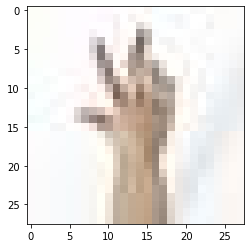

In [65]:
# train data와 흡사하게 코딩. 단 경로에 유의할 것
def load_data(img_path):
    # 가위 : 0, 바위 : 1, 보 : 2
    number_of_data=2520   # 가위바위보 이미지 개수 총합에 주의하세요.
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/Nscissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/Nrock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1       
    
    for file in glob.iglob(img_path+'/Npaper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1
        
    print("번외학습데이터(x_Ntrain)의 이미지 개수는",idx,"입니다.")
    return imgs, labels

# train data 경로가 아닌 test 경로
Ntrainimage_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/new"
(x_Ntrain, y_Ntrain)=load_data(Ntrainimage_dir_path)
x_Ntrain_norm = x_Ntrain/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_Ntrain shape: {}".format(x_Ntrain.shape))
print("y_Ntrain shape: {}".format(y_Ntrain.shape))

import matplotlib.pyplot as plt
plt.imshow(x_Ntrain[0])
print('라벨: ', y_Ntrain[0])

- **번외 train model 설계**
> **특징을 잡아낼 레이어 갯수 : 3ea  
> 레이어별 특징 갯수  
> _channel_1_ : 32  
> _channel_2_ : 64  
> _channel_3_ : 64  
> dense 레이어 뉴런수 : 128  
> 학습 반복횟수(dense) : 20  
> 기존 model의 최종 파라미터 입력**

In [66]:
n_channel_1=32
n_channel_2=64
n_channel_3=64
n_dense=128
n_Ntrain_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_Ntrain_norm, y_Ntrain, epochs=n_Ntrain_epoch)

# 모델 시험
Ntrain_loss, Ntrain_accuracy = model.evaluate(x_Ntrain_norm, y_Ntrain, verbose=2)
print("Ntrain_loss: {} ".format(Ntrain_loss))
print("Ntrain_accuracy: {}".format(Ntrain_accuracy))

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_57 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_58 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_59 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 64)              

- **번외 test model 설계**
> **특징을 잡아낼 레이어 갯수 : 3ea  
> 레이어별 특징 갯수  
> _channel_1_ : 32  
> _channel_2_ : 64  
> _channel_3_ : 64  
> dense 레이어 뉴런수 : 128  
> 학습 반복횟수(dense) : 20  
> 기존 model의 최종 파라미터 입력**

In [70]:
n_channel_1=32
n_channel_2=64
n_channel_3=64
n_dense=128
n_Ntrain_epoch=20

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Conv2D(n_channel_3, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_Ntrain_norm, y_Ntrain, epochs=n_Ntrain_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

Model: "sequential_23"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_69 (Conv2D)           (None, 26, 26, 32)        896       
_________________________________________________________________
max_pooling2d_69 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_70 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_70 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_71 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_71 (MaxPooling (None, 1, 1, 64)          0         
_________________________________________________________________
flatten_23 (Flatten)         (None, 64)              

 * **번외 모델 테스트결과**
> **accuracy : 0.8767**  
> **loss : 0.6898**  
    
    
***  
    
### - 결론
>  **오버피팅을 미연에 방지하기 위해서 dataset자체를 크게 키웠고, 입력되는 값을 0~1이 되게끔 정규화 하였다.  
> 그러나 오버피팅으로 인해 검증 시의 정확도가 학습 시에 비해 작게 나왔다.
> 하이퍼 파라미터를 조정하여 정확도를 높였고, 검증 시 정확도가 최고로 높게 나온 하이퍼 파라미터를 테스트 시에 적용하였다.  
> 테스트 시에도 정확도 75.6%가 나오는 것을 확인하였다.  
> 그러나 배경색, 손모양 등의 data가 정확도에 영향을 끼치는지 확인필요하다고 느꼈다.  
> 기존에 slack에 올라와있었던 배경이 흰색으로 통일되고, 손모양이 명확하게 보이는 data set을 활용하여 실험하기로 하였다.  
> 모델에서 다른조건을 통일하기위해서 이전 테스트에서 75.6%의 정확도를 달성했던 모델의 파라미터를 동일하게 적용하였고,  
> train dataset만 다르게 조정하여 학습시키고 테스트를 해보았다.  
> 테스트 결과 87.7%의 정확도 달성였고, 이는 dataset의 중요도를 나타낸다고 생각하였다.**  

***
### - 회고록

> **인생에서 처음 만들어보는 이미지 분류기였다.  
> 비록 가위바위보였지만 이것만으로도 엄청 어렵게 느껴졌다.  
> 코드도 하나도 이해가 가지않지않았다.  
> 코드를 한줄씩 뜯어서 보아도 '아니 이게 왜 이거지? 이건 이건가?'의 연속이었다.  
> 그렇게 천천히 고민하면서 복사붙여넣고, 오류나고, 고치고의 연속이었다.  
> 처음 학습데이터를 가지고 분류모델을 돌렸을때 정확도가 1에 가깝게 나와서 끝났다고 생각했다.  
> 그런데 검증데이터를 가지고 시험해보니 정확도가 말도 안되게 낮았다.  
> 오버피팅이었던 것이다. 오버피팅을 막기위해 정규화도 진행했고, 데이터셋도 다양한 사람들에게 받았었는데 소용이 없었다.  
> 결국 하이퍼 파라미터를 최대한 조절해서 정확도를 높이는 수밖에 없었다.  
> 그래도 다행이었던건 정확도를 높이려고 파라미터들을 조절하면서, 어렵고 힘들었던 분류기 모델이 그나마 친숙해졌다는 것이다.  
> (이부분을 노리고 만들어진 노드같이 느껴졌다.)  
> 앞으로도 계속해서 오류나고 고치고의 반복일 것 같다.  
> 그래도 천천히 하다보면 완성할수 있을것이라고 믿는다.**  
